In [1]:
import os
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms

In [2]:
class Dataset:
    def __init__(self, path, transform=None):
        self.path = path
        self.transform = transform
        self.images = []
        self.labels = []
        self.classEncoding = {'dog': 0, 'cat': 1, 'horse': 2, 'elephant': 3, 'butterfly': 4, 'chicken': 5, 'cow': 6, 'spider': 7, 'squirrel': 8, 'sheep': 9}
        self.load_data()

    def load_data(self):
        for filename in os.listdir(self.path):
            image = Image.open(os.path.join(self.path, filename))
            if self.transform:
                image = self.transform(image)
            self.images.append(image)
            label = filename.split('_')[0]
            self.labels.append(self.classEncoding[label])

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        return self.images[idx], self.labels[idx]

    def __iter__(self):
        for i in range(len(self)):
            yield self[i]

    def __repr__(self):
        return f'Dataset({self.path})'

In [3]:

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Lambda(lambda img: img.convert('RGB') if img.mode != 'RGB' else img),
    transforms.ToTensor()
])
data = Dataset('data/Training/', transform)
print(len(data))

21311


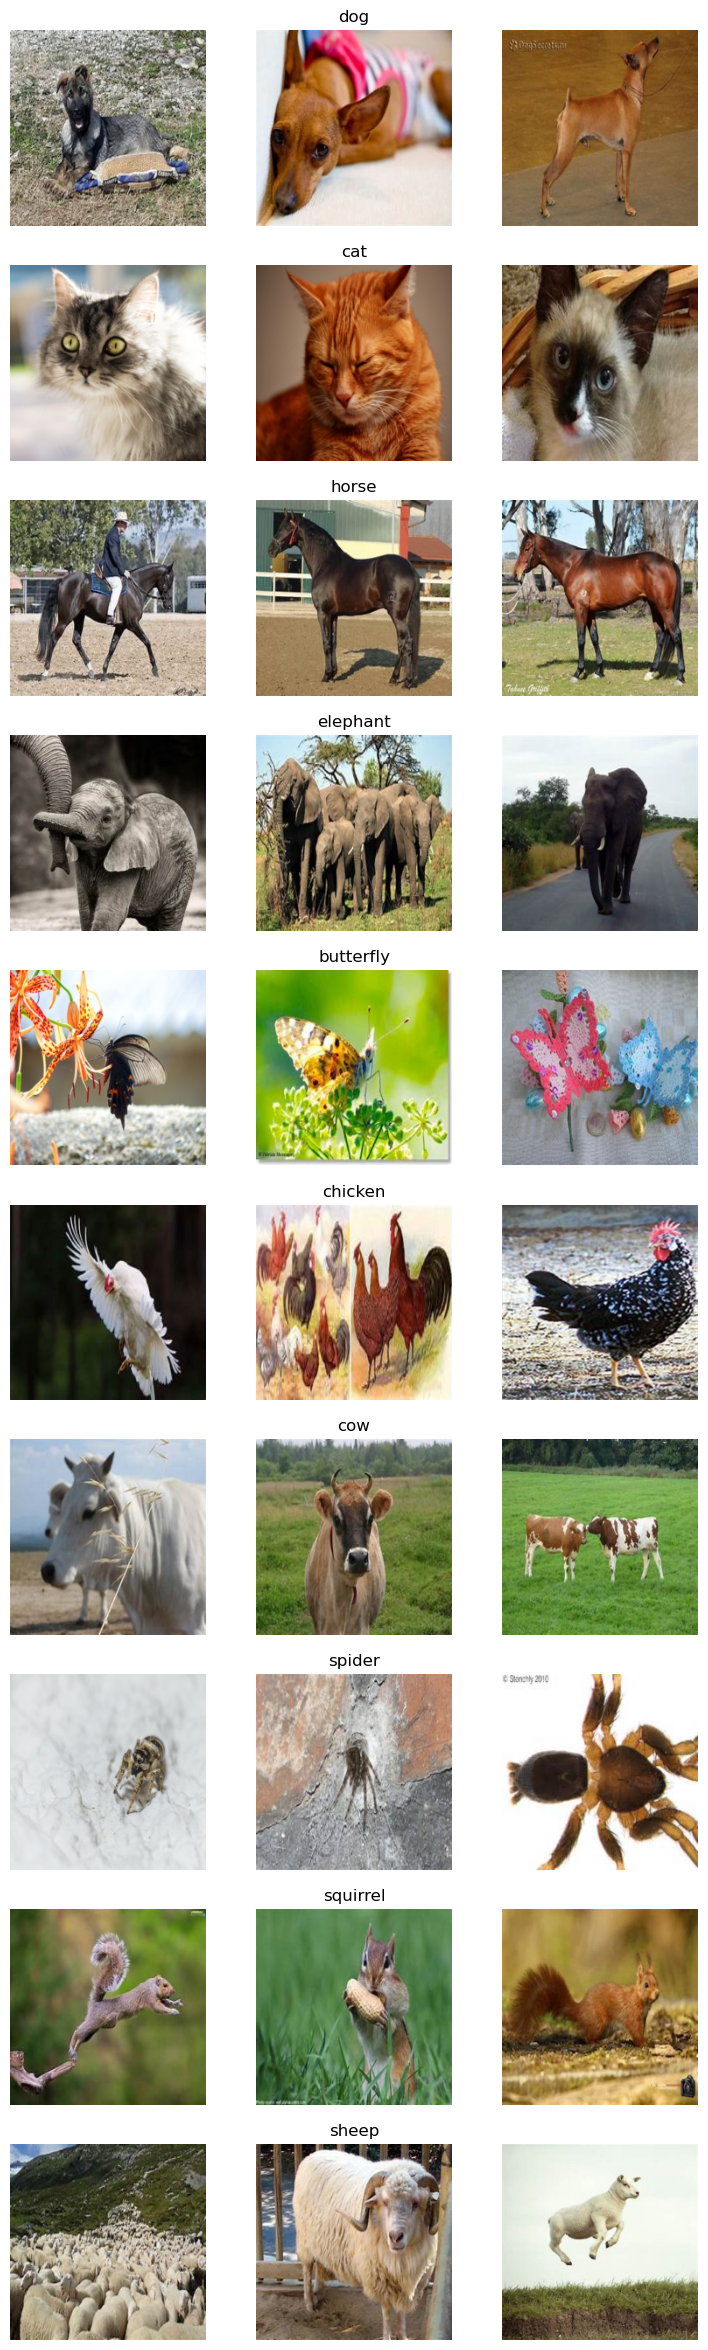

In [5]:
import random

fig, axes = plt.subplots(10, 3, figsize=(9, 30))
inverse_class_encoding = {v: k for k, v in data.classEncoding.items()}

for class_idx, class_name in inverse_class_encoding.items():
    class_samples = [img for img, label in data if label == class_idx]
    for i in range(3):
        ax = axes[class_idx, i]
        ax.imshow(class_samples[i].permute(1, 2, 0))
        ax.axis('off')
        if i == 1:
            ax.set_title(class_name)

{(150528,): 21311}
(21311, 150528)
(150528,)


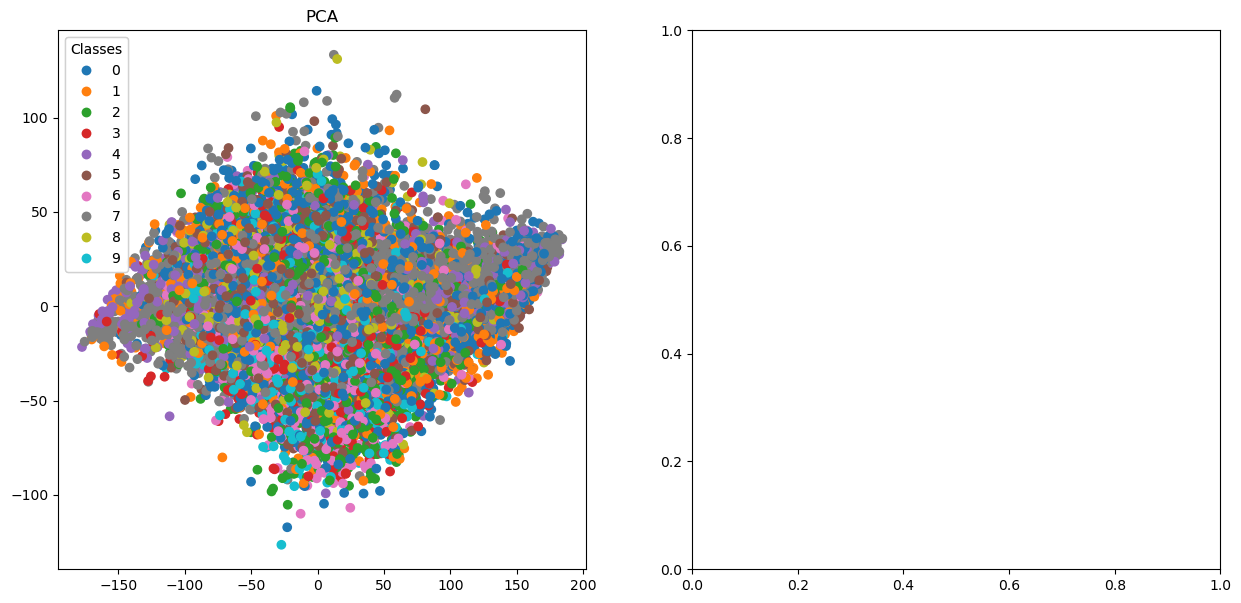

In [7]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import numpy as np

# Convert images to numpy arrays and flatten them
image_arrays = [np.array(img).flatten() for img, _ in data]
image_arrays = [img.flatten() for img in image_arrays]
# Count the different shapes in image_arrays
shape_counts = {}
for img in image_arrays:
    shape = img.shape
    if shape in shape_counts:
        shape_counts[shape] += 1
    else:
        shape_counts[shape] = 1
print(shape_counts)
image_arrays = np.array(image_arrays)
print(image_arrays.shape)
print(image_arrays[0].shape)
labels = [label for _, label in data]

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(image_arrays)

'''# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(image_arrays)'''

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# PCA plot
scatter = axs[0].scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='tab10')
legend1 = axs[0].legend(*scatter.legend_elements(), title="Classes")
axs[0].add_artist(legend1)
axs[0].set_title('PCA')

'''# t-SNE plot
scatter = axs[1].scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='tab10')
legend2 = axs[1].legend(*scatter.legend_elements(), title="Classes")
axs[1].add_artist(legend2)
axs[1].set_title('t-SNE')'''

plt.show()

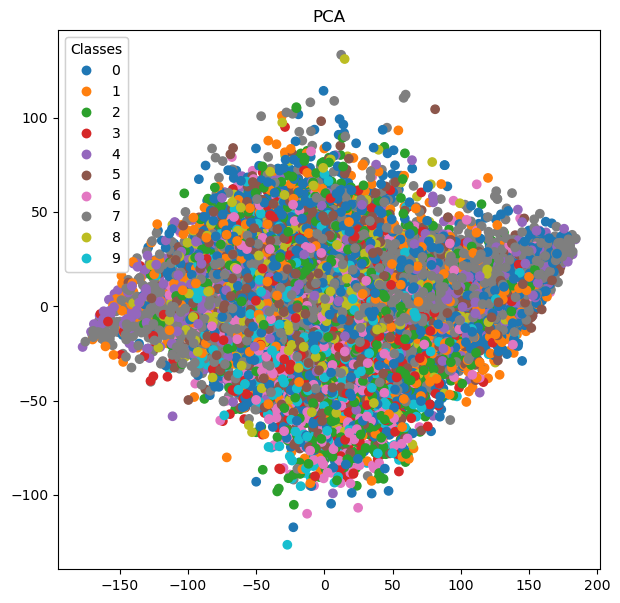

In [8]:
# Plotting PCA only
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='tab10')
legend = plt.legend(*scatter.legend_elements(), title="Classes")
plt.gca().add_artist(legend)
plt.title('PCA')
plt.show()